<a href="https://colab.research.google.com/github/anveshveeramalla/Anvesh_INFO5731_SPRING2022/blob/main/In_class_exercise_05_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 04/12/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/exercise05_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [8]:
# Write your code here
# Data Processing
import nltk
nltk.download('stopwords')
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_predict
import os
from sklearn import tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

# Load the Diabetes dataset
os.chdir('/content/sample_data/')
#os.chdir('C:\\Users\\LaptopCheckout\\Downloads\\INFO_5731\\data')
train_df = []
with open('stsa-train.txt') as f:
    train_df = f.readlines()
score =[i[0] for i in train_df]
review =[i[2:].strip('\n') for i in train_df]
train = {'score':score,'review':review}
train= pd.DataFrame(train)

test_df = []
with open('stsa-test.txt') as f:
    test_df = f.readlines()
score =[i[0] for i in test_df]
review =[i[2:].strip('\n') for i in test_df]
test = {'score':score,'review':review}
test= pd.DataFrame(test)

#stopword removal and lemmatization
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')
train_X = []
test_X = []
#text preprocessing
for i in range(0, len(train.review)):
    r = re.sub('[^a-zA-Z]', ' ', train.review[i])
    r = r.lower()
    r = r.split()
    r = [lemmatizer.lemmatize(word) for word in r if not word in set(stopwords)]
    r = ' '.join(r)
    train_X.append(r)
for i in range(0, len(test.review)):
    r = re.sub('[^a-zA-Z]', ' ', test.review[i])
    r = r.lower()
    r = r.split()
    r = [lemmatizer.lemmatize(word) for word in r if not word in set(stopwords)]
    r = ' '.join(r)
    test_X.append(r)
    
tf_idf = TfidfVectorizer()
X_train_tf = tf_idf.fit_transform(train_X)
X_train_tf = tf_idf.transform(train_X)
print(X_train_tf.shape)
X_test_tf = tf_idf.transform(test_X)
print(X_test_tf.shape)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
(6920, 12360)
(1821, 12360)


In [9]:
#MultinominalNB
np.random.seed(341)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tf, train.score)
y_pred = nb_classifier.predict(X_test_tf)
print( "No cross-validation")
print(metrics.classification_report(test.score, y_pred,target_names=['Positive', 'Negative']))
print( "Cross-validation")
p=cross_val_predict(nb_classifier, X_test_tf, test.score, cv=10)
print(metrics.classification_report(test.score, p,target_names=['Positive', 'Negative']))

No cross-validation
              precision    recall  f1-score   support

    Positive       0.86      0.72      0.78       912
    Negative       0.76      0.88      0.82       909

    accuracy                           0.80      1821
   macro avg       0.81      0.80      0.80      1821
weighted avg       0.81      0.80      0.80      1821

Cross-validation
              precision    recall  f1-score   support

    Positive       0.73      0.70      0.71       912
    Negative       0.71      0.74      0.73       909

    accuracy                           0.72      1821
   macro avg       0.72      0.72      0.72      1821
weighted avg       0.72      0.72      0.72      1821



In [10]:
#SVM
from sklearn import svm
np.random.seed(500)
clf = svm.SVC(kernel='linear', C=1, random_state=42)
clf.fit(X_train_tf, train.score)
# predict the labels on validation dataset
y_pred = clf.predict(X_test_tf)
print( "No cross-validation")
print(metrics.classification_report(test.score, y_pred,target_names=['Positive', 'Negative']))
print( "Cross-validation")
p = cross_val_predict(clf, X_test_tf, test.score, cv=10)
print(metrics.classification_report(test.score, p,target_names=['Positive', 'Negative']))

No cross-validation
              precision    recall  f1-score   support

    Positive       0.81      0.77      0.79       912
    Negative       0.78      0.82      0.80       909

    accuracy                           0.80      1821
   macro avg       0.80      0.80      0.80      1821
weighted avg       0.80      0.80      0.80      1821

Cross-validation
              precision    recall  f1-score   support

    Positive       0.71      0.72      0.71       912
    Negative       0.71      0.71      0.71       909

    accuracy                           0.71      1821
   macro avg       0.71      0.71      0.71      1821
weighted avg       0.71      0.71      0.71      1821



In [11]:
#KNN
np.random.seed(271)
knn_classifier = KNeighborsClassifier(60)
knn_classifier.fit(X_train_tf, train.score)
y_pred = knn_classifier.predict(X_test_tf)
print( "No cross-validation")
print(metrics.classification_report(test.score, y_pred,target_names=['Positive', 'Negative']))
p=cross_val_predict(knn_classifier, X_test_tf, test.score, cv=10)
print( "Cross-validation")
print(metrics.classification_report(test.score, p,target_names=['Positive', 'Negative']))

No cross-validation
              precision    recall  f1-score   support

    Positive       0.80      0.76      0.78       912
    Negative       0.77      0.81      0.79       909

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79      1821
weighted avg       0.79      0.79      0.79      1821

Cross-validation
              precision    recall  f1-score   support

    Positive       0.66      0.74      0.70       912
    Negative       0.70      0.62      0.66       909

    accuracy                           0.68      1821
   macro avg       0.68      0.68      0.68      1821
weighted avg       0.68      0.68      0.68      1821



In [12]:
#Decision Tree
from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier(random_state=23)
dt_classifier.fit(X_train_tf, train.score)
y_pred = dt_classifier.predict(X_test_tf)
print( "No cross-validation")
print(metrics.classification_report(test.score, y_pred,target_names=['Positive', 'Negative']))
p=cross_val_predict(dt_classifier, X_test_tf, test.score, cv=10)
print( "Cross-validation")
print(metrics.classification_report(test.score, p,target_names=['Positive', 'Negative']))

No cross-validation
              precision    recall  f1-score   support

    Positive       0.66      0.68      0.67       912
    Negative       0.67      0.65      0.66       909

    accuracy                           0.66      1821
   macro avg       0.66      0.66      0.66      1821
weighted avg       0.66      0.66      0.66      1821

Cross-validation
              precision    recall  f1-score   support

    Positive       0.61      0.69      0.64       912
    Negative       0.64      0.56      0.59       909

    accuracy                           0.62      1821
   macro avg       0.62      0.62      0.62      1821
weighted avg       0.62      0.62      0.62      1821



In [13]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tf, train.score)
y_pred = rf_classifier.predict(X_test_tf)
print( "No cross-validation")
print(metrics.classification_report(test.score, y_pred,target_names=['Positive', 'Negative']))
p=cross_val_predict(rf_classifier, X_test_tf, test.score, cv=10)
print( "Cross-validation")
print(metrics.classification_report(test.score, p,target_names=['Positive', 'Negative']))

No cross-validation
              precision    recall  f1-score   support

    Positive       0.74      0.76      0.75       912
    Negative       0.76      0.74      0.75       909

    accuracy                           0.75      1821
   macro avg       0.75      0.75      0.75      1821
weighted avg       0.75      0.75      0.75      1821

Cross-validation
              precision    recall  f1-score   support

    Positive       0.62      0.82      0.71       912
    Negative       0.74      0.50      0.59       909

    accuracy                           0.66      1821
   macro avg       0.68      0.66      0.65      1821
weighted avg       0.68      0.66      0.65      1821



In [14]:
#XGBoost
from xgboost import XGBClassifier
xg_classifier = RandomForestClassifier()
xg_classifier.fit(X_train_tf, train.score)
y_pred = xg_classifier.predict(X_test_tf)
print( "No cross-validation")
print(metrics.classification_report(test.score, y_pred,target_names=['Positive', 'Negative']))
p=cross_val_predict(xg_classifier, X_test_tf, test.score, cv=10)
print( "Cross-validation")
print(metrics.classification_report(test.score, p,target_names=['Positive', 'Negative']))

No cross-validation
              precision    recall  f1-score   support

    Positive       0.74      0.76      0.75       912
    Negative       0.75      0.73      0.74       909

    accuracy                           0.75      1821
   macro avg       0.75      0.75      0.75      1821
weighted avg       0.75      0.75      0.75      1821

Cross-validation
              precision    recall  f1-score   support

    Positive       0.61      0.82      0.70       912
    Negative       0.73      0.48      0.58       909

    accuracy                           0.65      1821
   macro avg       0.67      0.65      0.64      1821
weighted avg       0.67      0.65      0.64      1821



(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [15]:
#Write your code here.
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

nltk.download('stopwords')
sno = nltk.stem.SnowballStemmer('english')
stemmer = PorterStemmer()
nltk.download('punkt')

df=pd.read_csv("/content/sample_data/Amazon_Unlocked_Mobile.csv")
df.columns=['ProductName', 'BrandName', 'Price', 'Rating', 'Reviews','ReviewVotes']
#function
def categorizer(x):
    if x < 3:
        return 'negative'
    return 'positive'
#change reviews with score less than 3 to be negative
a = df.Rating
df['Ratings2'] = a.map(categorizer)
df=df.sort_values('ProductName', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
final=df.drop_duplicates(subset={'ProductName', 'BrandName', 'Price', 'Rating', 'Reviews','ReviewVotes'},
                                  keep='first', inplace=False)
stop=set(stopwords.words('english'))
def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

df=df.dropna(0, any, 1,inplace=False)
df = df.sample(n=100000)

# Lets do some text cleanup
R = re.compile('[/(){}\[\]\|@,;]')
B = re.compile('[^0-9a-z #+_]')
N = re.compile('[\d+]')

def clean_text(text):
    text=str(text)
    text = text.lower() 
    text = R.sub(' ', text)
    text = text.replace('x', '') 
    text = N.sub('', text)
    text = B.sub('', text)
    text = ' '.join(word for word in text.split() if word not in stop)
    text = ' '.join(word for word in text.split() if (len(word) >= 2 and len(word) <= 21))
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

df['Reviews'] = df['Reviews'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only


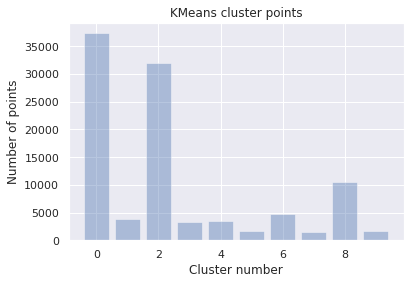

In [16]:
#K-Means clustering
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_train_vc = vectorizer.fit_transform(df["Reviews"].values)
vr = TfidfVectorizer()
X_train_vc = vr.fit_transform(df["Reviews"].values)
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10,random_state=99)
model_tf.fit(X_train_vc)

df['newlabels'] = model_tf.labels_
df.groupby(['newlabels'])['Reviews'].count()

plt.bar([x for x in range(10)], df.groupby(['newlabels'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [17]:
#DBScan Clustering
import gensim

i=0
list_of_sent=[]
for line in df["Reviews"].values:
    list_of_sent.append(line.split())
    
w2v_model=gensim.models.Word2Vec(list_of_sent, workers=4)

sent_vectors = [];
for sent in list_of_sent:
    sent_vec = np.zeros(100)
    cnt_words =0; 
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


(100000, 100)

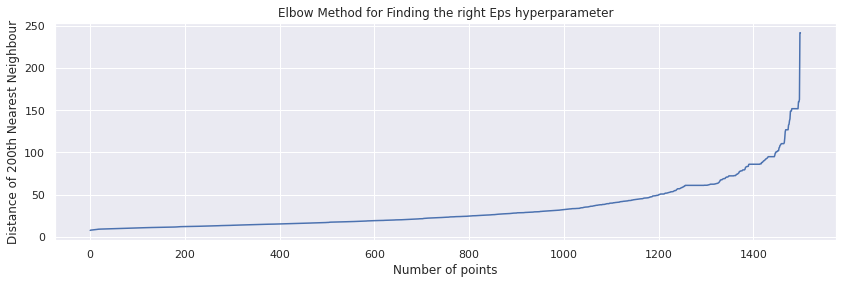

In [18]:
from sklearn.cluster import DBSCAN
minPts = 100

def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] 

twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

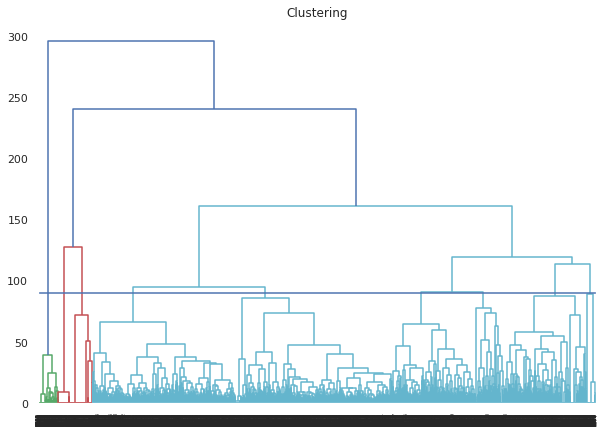

In [19]:
#Hierarchical clustering
import scipy.cluster.hierarchy as shc
%matplotlib inline
#reduce data dimensions
sentvectors = sent_vectors[1:10000,1:100]
plt.figure(figsize=(10, 7))
plt.title("Clustering")
dend = shc.dendrogram(shc.linkage(sentvectors, method='ward'))
plt.axhline(y=90)

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sentvectors)

In [ ]:
#You can write you answer here. (No code needed)




K-Means clustering is a partitional clustering technique in which each cluster has a central point and each point is assigned to the cluster with the closest centroid. The number K denotes the number of clusters. Euclidean distance, cosine similarity, correlation, and other metrics are used to determine how close two people are. K-Means has some drawbacks, such as clusters of varying sizes, densities, and forms.

Agglomerative and Divisive hierarchical clustering are the two types of hierarchical clustering. It generates a hierarchical tree with nested clusters that resembles a dendrogram. Sensitivity to noise and outliers, computational complexity in time and space, and the inability to undo the combination of the two clusters are just a few of the drawbacks.

 density-based clustering approach called DBScan clustering. A boundary point has fewer points than a core point. Any point that isn't a core or boundary point is referred to as a noise point.

The Hierarchical model, which has the highest accuracy, is the most accurate, followed by Kmeans and DBSCAN. The most effective model is heirarchical clustering.